In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Additionally added libraries

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
#### Remember to unpack data from .zip folders

Investigating loaded data

In [3]:
tX[tX==-999] = np.nan

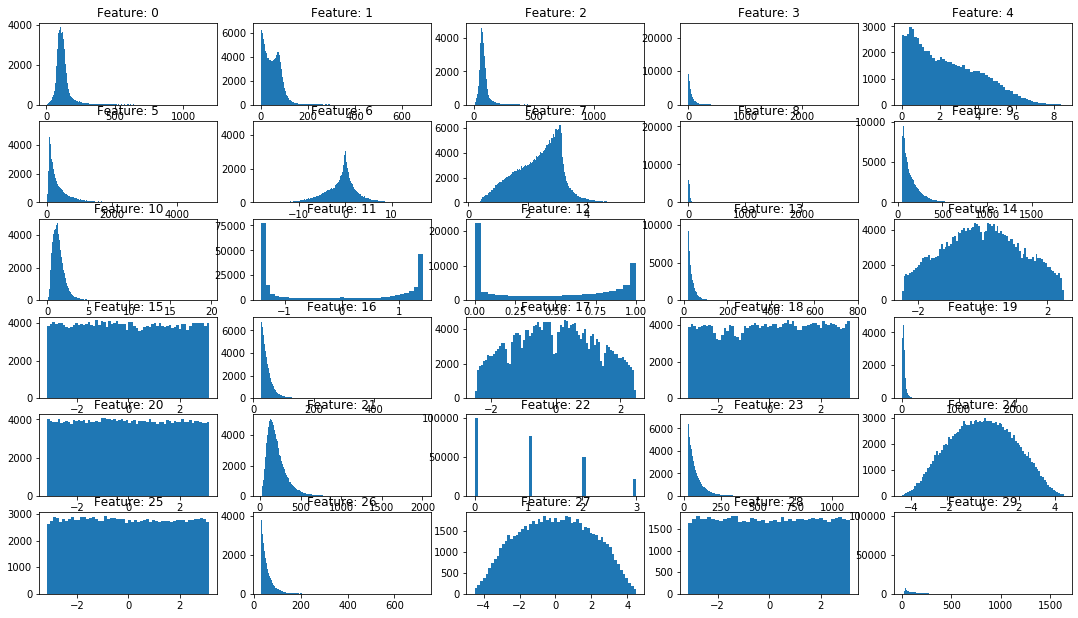

In [4]:
# Histogram tX
nrows = 6
ncols = 5
fig, axes = plt.subplots(nrows, ncols)

feature_id = 0
for row in range(nrows):
    for col in range(ncols):
        feature_tbp  = tX[:,feature_id]
        axes[row, col].hist(feature_tbp[~np.isnan(feature_tbp)], bins='auto')
        axes[row, col].set_title('Feature: {}'.format(feature_id))
        feature_id += 1
    
    
fig.set_size_inches(18.5, 10.5)

List of skewed features: 0, 2, 3, 4, 5, 7, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29

In [ ]:
## Histogram last feature to show how problematic 0's are in this feature. 
plt.hist(tX[:,29], bins='auto')

In [6]:
# Numerical exploratory data analysis
# row1: mean | row2: variance | row3: standard deviation 
# row4: minimum value | row5: maximum value | row6: number of NaN's
from data_wrangling import compute_statistics

feature_statistics = compute_statistics(tX)

# Show amount of nans
print(feature_statistics[5,:])

[ 38114.      0.      0.      0. 177457. 177457. 177457.      0.      0.
      0.      0.      0. 177457.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.  99913.  99913.  99913. 177457.
 177457. 177457.      0.]


In [7]:
# store median, mean and std
train_mean = feature_statistics[0, :]
train_std = feature_statistics[2, :]
train_median = feature_statistics[6, :]

In [12]:
# List of skewed features to be log transformed
skewed_features = [0, 2, 3, 4, 5, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29]

#Replace NaN's with median values
from clean_nan import *
from data_wrangling import shift_zeros, log_transform, standardize_features

## have to shift 0 with 0.0005 in order to avoid log(0)
zero_shift = 0.0005 # Done to avoid computing log(0)
categorical_index = 22 # index to avoid standardization because its categorical

tX_nan_replaced = clean_nan(tX, train_median, categorical_index)
tX_noZero = shift_zeros(tX_nan_replaced, skewed_features, zero_shift)
tX_logged = log_transform(tX_noZero, skewed_features)
tx_ = standardize_features(tX_logged, categorical_index, train_mean, train_std)

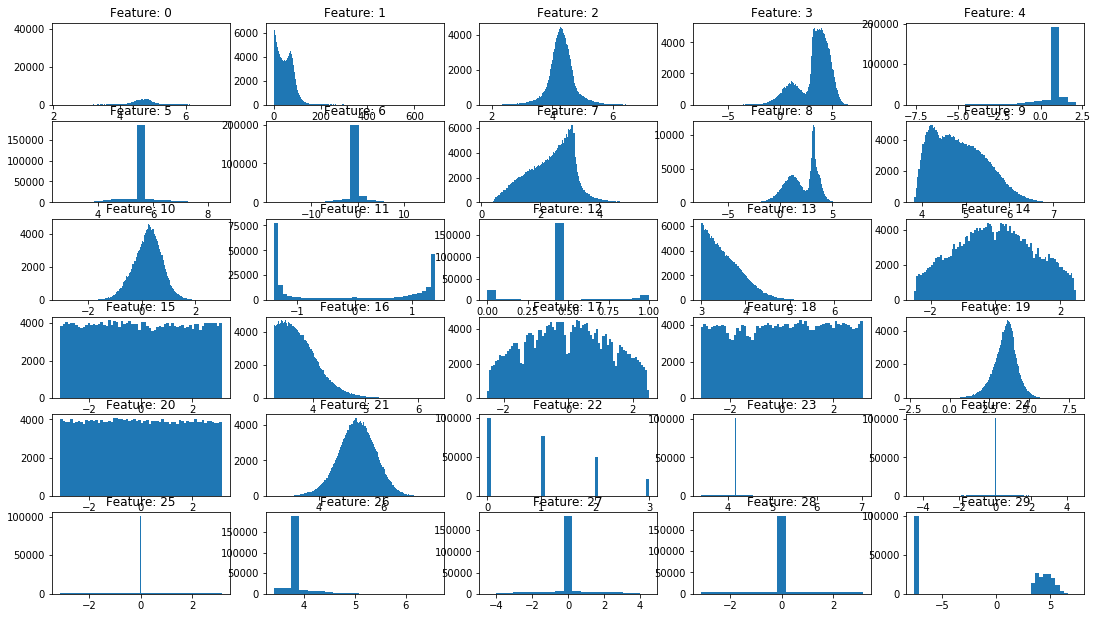

In [13]:
nrows = 6
ncols = 5
fig, axes = plt.subplots(nrows, ncols)

feature_id = 0
for row in range(nrows):
    for col in range(ncols):
        feature_tbp  = tX_logged[:,feature_id]
        axes[row, col].hist(feature_tbp[~np.isnan(feature_tbp)], bins='auto')
        axes[row, col].set_title('Feature: {}'.format(feature_id))
        feature_id += 1
    
    
fig.set_size_inches(18.5, 10.5)

We have to standardize dataset - a wide variety of ranges can be observed in the dataset. Would lead to a biased learning algorithm

In [15]:
import pandas as pd
view_data_nicely = pd.DataFrame(tx_)
view_data_nicely

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.040697,0.068332,-1.876106,-0.857183,-1.433834,-0.922707,0.973036,0.882478,-0.681591,-1.323573,...,-0.147267,-1.614566,2.0,-1.328852,1.206627,0.251681,-1.683556,0.616148,-1.361312,-0.697164
1,-2.038072,0.552505,-1.874788,-0.848657,-0.951932,-0.921213,0.161170,1.404888,-0.816485,-1.327527,...,-1.051683,-1.618144,1.0,-1.335077,0.408102,0.645421,-1.682331,0.000908,-0.000230,-0.706328
2,-2.044336,3.195156,-1.869916,-0.853384,-0.951932,-0.921213,0.161170,0.989770,-0.749029,-1.323570,...,-1.200672,-1.614515,1.0,-1.335797,1.152271,-1.111520,-1.682331,0.000908,-0.000230,-0.706773
3,-2.040025,0.910379,-1.880746,-0.923373,-0.951932,-0.921213,0.161170,1.196690,-0.888916,-1.331842,...,0.038692,-1.623267,0.0,-1.329317,0.001835,-0.011364,-1.682331,0.000908,-0.000230,-0.822987
4,-2.036524,-0.914556,-1.868253,-0.865571,-0.951932,-0.921213,0.161170,1.938794,-0.723720,-1.334176,...,-0.475042,-1.627080,0.0,-1.329317,0.001835,-0.011364,-1.682331,0.000908,-0.000230,-0.822987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-2.044336,0.643636,-1.900220,-0.884104,-0.951932,-0.921213,0.161170,-1.253146,-0.776688,-1.334494,...,1.583208,-1.619162,0.0,-1.329317,0.001835,-0.011364,-1.682331,0.000908,-0.000230,-0.822987
249996,-2.044336,0.252913,-1.884984,-0.860650,-0.951932,-0.921213,0.161170,0.270657,-0.709658,-1.335351,...,-0.472835,-1.623805,0.0,-1.329317,0.001835,-0.011364,-1.682331,0.000908,-0.000230,-0.822987
249997,-2.045450,0.319316,-1.882341,-0.851664,-0.951932,-0.921213,0.161170,0.021586,-0.710173,-1.327857,...,-1.589146,-1.616645,1.0,-1.336661,1.010498,-0.084708,-1.682331,0.000908,-0.000230,-0.707308
249998,-2.047281,-0.845324,-1.884723,-0.868628,-0.951932,-0.921213,0.161170,1.266941,-0.732457,-1.334499,...,0.453102,-1.621134,0.0,-1.329317,0.001835,-0.011364,-1.682331,0.000908,-0.000230,-0.822987


In [ ]:
# Saving arrays to .py file. Can easily be loaded with np.load('path' + 'filename')
####np.save('tX_cleaned', tX)
####np.save('tX_standardized', tX_standardized)
# Commented this section out to prevent overwriting of dataset

## Do your thing crazy machine learning thing here :) ...

### Linear regression using gradient descent

In [ ]:
#from least_squares_GD import *
from costs import compute_mse
from least_squares_GD import *
from parameter_tuning import gamma_tuning_SGD
from parameter_tuning import gamma_tuning_GD

# Initialization of the weights
initial_w = np.zeros(tx_.shape[1])

# Define the parameters necessary for gradient descent: need to tune gamma. 
# we use the gamma_tuning_SGD for less costly tuning
max_iters = 50
gamma = gamma_tuning_GD(y, tx_, initial_w, max_iters)

w1, loss1 = least_squares_GD(y, tx_, initial_w, max_iters, gamma)
#print(w1)
#print(loss1)

"""w1_ = w1.copy()
print(w1_)
for i in range(len(w1)):
    w1_[i] = w1_[i]*feature_std[i] +  feature_mean[i]
    """

In [ ]:
print(loss1)

### Least squares with SGD

In [ ]:
from least_squares_SGD import *
#No need to re-tune gamma BUT NOT SURE
#Here batch_size is set at 1


# Initialization of the weights BUT we could use w1 as a start AND careful with tuning
initial_w = np.zeros(tx_.shape[1])
gamma = gamma_tuning_GD(y, tx_, initial_w, max_iters)

w2, loss2 = least_squares_SGD(y, tx_, initial_w, 1, max_iters, gamma)
#print(w2)
print(loss2)
w2_ = w2.copy()
print(w1_)
for i in range(len(w2)):
    w2_[i] = w2_[i]*feature_std[i] +  feature_mean[i]

### Least Squares using Normal Equations

In [49]:
from least_squares import *
from build_polynomial import *
from parameter_tuning import degree_tuning_LS

# degree = degree_tuning_LS(y , tx_)
# Initialization of the weights BUT could use w2
initial_w = np.zeros(tx_.shape[1]) 

#poly_x = build_poly(tx_, degree)

w3, loss3 = least_squares(y, tx_)
#_, loss3_expand = least_squares(y, poly_x)
print(loss3)
#print(loss3_expand)

"""w3_ = w3.copy()
for i in range(len(w3)):
    w3_[i] = w3_[i]*feature_std[i] +  feature_mean[i]
    """

1.1711823234520395


'w3_ = w3.copy()\nfor i in range(len(w3)):\n    w3_[i] = w3_[i]*feature_std[i] +  feature_mean[i]\n    '

### Ridge regression

In [48]:
from ridge_regression import *
from parameter_tuning import lambda_tuning_ridge

# Tuning of lambda
lambda_ = lambda_tuning_ridge(y, tx_)

#lambda_ = 0
print(lambda_)

# Computing the loss
w4, loss4 = ridge_regression(y, tx_, lambda_)
print(w4)
print(loss4)
#print(loss4)
#w4_ = w4.copy()
#for i in range(len(w4)):
#    w4_[i] = w4_[i]*feature_std[i] +  feature_mean[i]

3.831186849557293e-16
[ 1.14839049e+01 -2.28762031e-01 -2.16281784e+01  5.12174190e-01
 -1.25662644e-01  2.05094143e+01 -1.42059321e-01  2.37206068e-01
 -4.99400042e-01  1.31249671e+01  5.52027470e+00  1.08611790e-01
  1.90059489e-01  1.60892212e+02 -7.24179350e-04 -1.32961852e-03
 -1.39849857e+02 -1.16162387e-03  3.08109151e-03  5.50614155e-03
  1.05743160e-03 -4.54536909e-01 -6.86574095e-02  2.47834857e+00
 -5.67563716e-04  5.82270635e-05 -6.09594441e+00  1.59039867e-03
 -1.72441013e-03  5.46596264e-01]
1.1711823234520389


### Logistic Regression

In [ ]:
from logistic_regression import *
from parameter_tuning import gamma_tuning_log

# Initialization of the weights BUT could use w2
initial_w = np.zeros(tx_.shape[1])
# Tuning of gamma
#gamma = gamma_tuning_log(y, tx_, initial_w, max_iters)
gamma=0.0000000000000001
w5, loss5 = logistic_regression(y, tx_, initial_w, max_iters, gamma)
print(w5)
print(loss5)
w5_ = w5.copy()
for i in range(len(w5)):
    w5_[i] = w5_[i]*feature_std[i] +  feature_mean[i]

# Predictions

In [ ]:
## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)


In [ ]:
pretty_view = pd.DataFrame(tX_test)
pretty_view

In [ ]:
# STANDARDIZE TX TEST

### replace -999 with nans and calculate mean pluss std
tX_test[tX_test==-999] = np.nan

test_mean = np.zeros(tX_test.shape[1]).T
test_std = np.zeros(tX_test.shape[1]).T
test_median = np.zeros(tX_test.shape[1]).T

for i in range(tX_test.shape[1]):
    test_mean[i] = np.nanmean(tX_test[:,i])
    test_std[i] = np.nanstd(tX_test[:,i])
    test_median[i] = np.nanmedian(tX_test[:,i])
    
### replace NaN's, shift zeroes and log transform data
tX_test_nan_replaced = clean_nan(tX_test, test_median)
tX_test_noZero = shift_zeros(tX_test_nan_replaced, skewed_features, zero_shift)
tX_test_logged = log_transform(tX_test_noZero, skewed_features)
tX_test_standardized = standardize_features(tX_test_logged, categorical_index, test_mean, test_std)

In [ ]:
pretty_view = pd.DataFrame(tX_test_logged)
pretty_view

In [ ]:
OUTPUT_PATH = '../data/sample-submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w4, tX_test_logged) # CAREFUL IT'S W3
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
weights = w2

In [ ]:
OUTPUT_PATH = '../data/sample-submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)